In [202]:
# Dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer

In [234]:
# Set function for scatter plot, correlation analysis, regression coefficient, linear equation, & saving figure
def linregres_func(x_values, y_values, x_label, y_label, ann_horizontal, ann_vertical, savefile): 
                                                                            
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    eq_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, c='lightskyblue', edgecolor='maroon')
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(eq_line, (ann_horizontal, ann_vertical), fontsize=11, color='red')
    plt.title(f" {x_label} vs {y_label} \n")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f'figures/{savefile}')
    plt.show()

## Correlations Summary
Based on Normalized Data


In [76]:
# Load/Read Normalized Data
pd.set_option('display.max_columns', None)
path_Normalized_v2 = "Data sets/Normalized Table 2017_df_v2.csv"
df_normalized = pd.read_csv(path_Normalized_v2)
df_normalized.head(3)

,Country name,Code,GDP,Happiness Index,Log GDP,Social support,Healthy life exp,Freedom,Generosity,Pct corruption,Blue Index,Suicide,Depression & Anxiety,Substance Abuse,Physician perpop,Average Age,Sleep (min),Gini index,Pct Poverty,Pct spent ed,Literacy rate,Tourist arrivals,Rev tourism,Fragile index,Security index,brain drain,Unemployment rate,Continent
0,Afghanistan,AFG,0.012110,0.000000,0.138829,0.096154,0.177083,0.000000,0.233766,1.000000,0.187569,0.071535,0.394462,0.096709,0.393047,0.106583,NaN,NaN,NaN,0.375431,NaN,NaN,0.000000,0.141956,0.000000,0.920000,0.402182,Asia
1,Albania,ALB,0.109372,0.385965,0.553145,0.384615,0.718750,0.571429,0.337662,0.911392,0.179251,0.089793,0.111179,0.336781,0.393047,0.548589,NaN,NaN,NaN,0.234483,NaN,0.053397,0.026802,0.028391,0.425287,0.840000,0.498871,Europe
2,Argentina,ARG,0.202865,0.658869,0.655098,0.903846,0.725694,0.714286,0.142857,0.860759,0.284617,0.254116,0.361231,0.238505,0.393047,0.510972,0.506173,0.544803,0.344675,0.271983,NaN,0.077236,0.076677,0.466877,0.379310,0.226667,0.295711,Americas


In [103]:
# Re-arrange variable columns
correlation_overview = df_normalized.loc[:, ['brain drain', 'Security index',  'Fragile index ', 'Pct Poverty','Pct corruption',
                                      'Unemployment rate', 'Physician perpop', 'Substance Abuse', 'Depression & Anxiety',
                                      'Pct spent ed', 'Suicide', 'Blue Index', 'Tourist arrivals', 'Average Age', 
                                      'Rev tourism', 'Literacy rate', 'Sleep (min)', 'Generosity', 'Healthy life exp',
                                      'Freedom', 'Social support', 'Log GDP', 'Happiness Index' ]]

In [104]:
# Dispaly correlation table
overview = correlation_overview.corr(method='pearson').round(decimals=2)
overview

,brain drain,Security index,Fragile index,Pct Poverty,Pct corruption,Unemployment rate,Physician perpop,Substance Abuse,Depression & Anxiety,Pct spent ed,Suicide,Blue Index,Tourist arrivals,Average Age,Rev tourism,Literacy rate,Sleep (min),Generosity,Healthy life exp,Freedom,Social support,Log GDP,Happiness Index
brain drain,1.00,0.63,0.39,0.59,0.44,-0.08,-0.15,-0.10,-0.43,0.23,-0.40,-0.40,-0.46,-0.35,-0.53,-0.59,-0.51,-0.05,-0.79,-0.26,-0.71,-0.86,-0.72
Security index,0.63,1.00,0.56,0.22,0.40,-0.09,-0.14,-0.03,-0.30,-0.04,-0.36,-0.30,-0.22,-0.39,-0.25,-0.27,-0.49,-0.12,-0.56,-0.21,-0.41,-0.60,-0.47
Fragile index,0.39,0.56,1.00,-0.07,0.35,-0.02,0.10,-0.00,-0.11,-0.01,-0.24,-0.15,-0.19,-0.13,-0.21,-0.52,-0.39,-0.11,-0.35,-0.14,-0.28,-0.41,-0.32
Pct Poverty,0.59,0.22,-0.07,1.00,0.01,0.11,0.02,-0.34,-0.42,0.24,-0.36,-0.42,-0.49,0.13,-0.43,-0.63,-0.31,-0.10,-0.52,0.04,-0.33,-0.65,-0.29
Pct corruption,0.44,0.40,0.35,0.01,1.00,0.19,0.07,0.15,-0.19,-0.00,-0.07,-0.03,-0.14,-0.11,-0.25,-0.21,-0.48,-0.40,-0.35,-0.49,-0.25,-0.37,-0.44
Unemployment rate,-0.08,-0.09,-0.02,0.11,0.19,1.00,0.19,0.04,0.22,-0.09,-0.05,0.09,0.03,0.16,-0.03,0.06,0.25,-0.31,0.06,-0.42,-0.03,0.07,-0.21
Physician perpop,-0.15,-0.14,0.10,0.02,0.07,0.19,1.00,-0.03,0.10,0.02,-0.03,0.01,-0.07,0.33,-0.05,0.22,0.10,-0.07,0.10,-0.03,-0.00,0.13,0.02
Substance Abuse,-0.10,-0.03,-0.00,-0.34,0.15,0.04,-0.03,1.00,0.09,-0.20,0.61,0.79,-0.18,0.21,-0.24,0.36,0.19,-0.19,0.10,-0.13,0.27,0.11,0.06
Depression & Anxiety,-0.43,-0.30,-0.11,-0.42,-0.19,0.22,0.10,0.09,1.00,-0.07,0.28,0.58,0.22,0.08,0.24,0.26,0.47,-0.08,0.33,-0.06,0.23,0.43,0.18
Pct spent ed,0.23,-0.04,-0.01,0.24,-0.00,-0.09,0.02,-0.20,-0.07,1.00,-0.15,-0.19,0.02,0.14,0.11,-0.09,-0.08,0.16,-0.07,0.23,0.08,-0.07,0.18


<IPython.core.display.Javascript object>


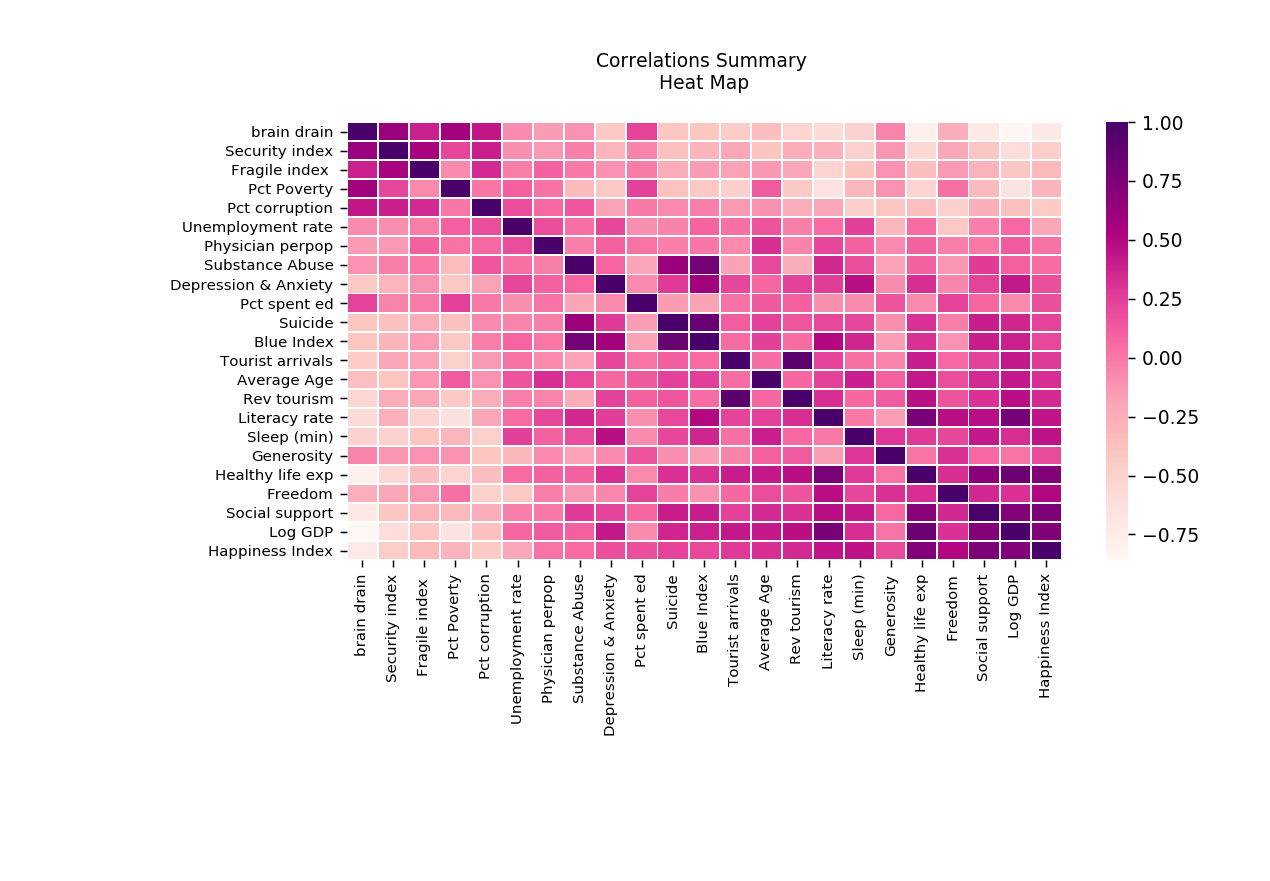

In [189]:
# Plot and display correlation summary heatmap
%matplotlib notebook
sns.heatmap(overview, 
            xticklabels=overview.columns,
            yticklabels=overview.columns,
            cmap='RdPu',#bwr
            annot=False,
            linewidth=.5)
plt.title('Correlations Summary \n Heat Map \n ', fontsize= 10)
plt.tight_layout()
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('figures/Correlation Summary Heatmap')
plt.show()

##  Focus: Impact of Economic Health to Happiness 
- Log GDP and Unemployment Rate data are correlated with Happiness Index

In [110]:
# Select Variables Pertaining to Economic Health vs Happiness Index
Economic_health_Correlation = df_normalized.loc[:, ['Happiness Index', 'Log GDP', 'Unemployment rate',]]

In [111]:
# Display correlation table
Economic_health_Correlation = Economic_health_Correlation.corr(method='pearson').round(decimals=2)
Economic_health_Correlation

,Happiness Index,Log GDP,Unemployment rate
Happiness Index,1.00,0.73,-0.21
Log GDP,0.73,1.00,0.07
Unemployment rate,-0.21,0.07,1.00


<IPython.core.display.Javascript object>


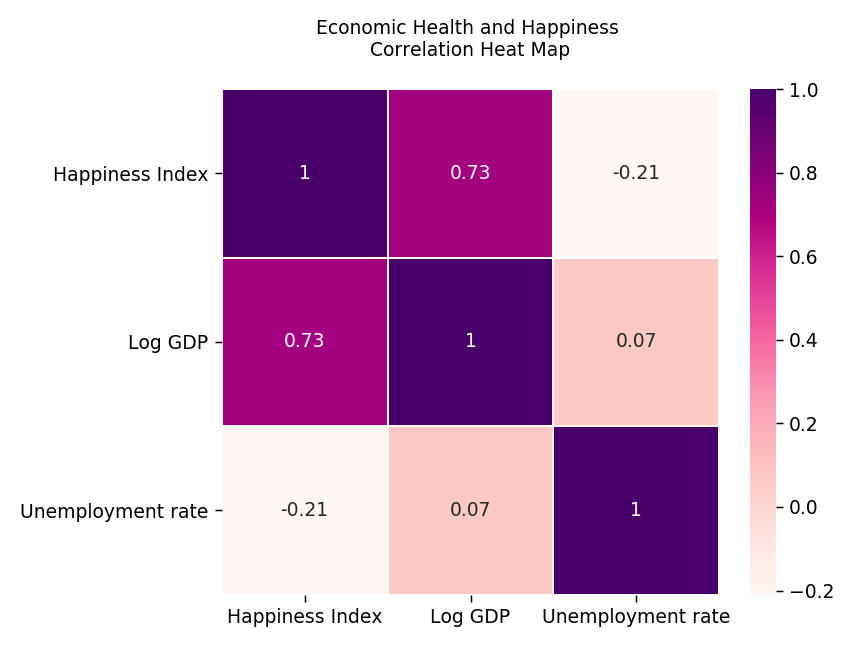

In [188]:
# Plot and display heat map of economic health vs happiness correlations
%matplotlib notebook
sns.heatmap(Economic_health_Correlation, 
            xticklabels=Economic_health_Correlation.columns, 
            yticklabels=Economic_health_Correlation.columns,
            cmap='RdPu',#bwr
            annot=True,
            linewidth=.5)
plt.title('Economic Health and Happiness \n Correlation Heat Map \n ', fontsize= 10)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('figures/Economic Health and Happiness Heatmap')
plt.show()

### Sample Y2017 Data Analysis

In [330]:
# Load/Read Data
pd.set_option('display.max_columns', None)
path = "Data sets/df_2017.csv"
df_2017 = pd.read_csv(path)
# Clean csv
del df_2017['Unnamed: 0']
df_2017.head(1)

,Country name,Code,year,GDP,Happiness Index,Log GDP,Social support,Healthy life exp,Freedom,Generosity,Pct corruption,Blue Index,Suicide,Depression & Anxiety,Substance Abuse,Physician perpop,Average Age,Sleep (min),Gini index,Pct Poverty,Pct spent ed,Literacy rate,Tourist arrivals,Rev tourism,Fragile index,Security index,brain drain,Unemployment rate,continent
0,Afghanistan,AFG,2017,2203.0,2.66,7.47,0.49,52.8,0.43,-0.11,0.95,11.681783,5.25,4279.0,521.797725,2.4356,18.8,NaN,NaN,NaN,15.66,NaN,NaN,16.0,17.3,1.0,8.2,11.18,Asia


In [355]:
# Sort and determine Top Countries with Highest Log GDP 
Top_logGDP = df_2017.loc[:, ['Country name', 'Log GDP', 'Happiness Index']]
Top_logGDP.sort_values(['Log GDP'], ascending=False, inplace=True) 
Top_logGDP.head()

,Country name,Log GDP,Happiness Index
67,Luxembourg,11.44,7.06
101,Singapore,11.38,6.38
118,United Arab Emirates,11.11,7.04
53,Ireland,11.10,7.06
61,Kuwait,11.10,6.09


In [356]:
# Inspect countries with a  High Log GDP but with Low Happiness Index based on a set criteria
HighGDP_LowHappy = Top_logGDP[(Top_logGDP["Happiness Index"]<=5.5) 
                              & (Top_logGDP["Log GDP"]>=10)]
HighGDP_LowHappy.sort_values(['Log GDP'], ascending=False, inplace=True)
HighGDP_LowHappy.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country name,Log GDP,Happiness Index
47,Hong Kong S.A.R. of China,10.93,5.36
71,Malaysia,10.25,5.34
42,Greece,10.11,5.15
27,Croatia,10.04,5.34


In [357]:
# Sort and determine Top Countries with Highest Unemployment in Y2017
Top_Unemployment = df_2017.loc[:, ['Country name', 'Unemployment rate', 'Happiness Index']]
Top_Unemployment.sort_values(['Unemployment rate'], ascending=False, inplace=True) 
Top_Unemployment.head()

,Country name,Unemployment rate,Happiness Index
104,South Africa,27.07,4.51
87,Palestinian Territories,25.68,4.63
68,Macedonia,22.38,5.23
42,Greece,21.49,5.15
13,Bosnia and Herzegovina,20.53,5.09


In [358]:
# Inspect Unemployment but with the High Happiness Index based on a set criteria
HighUnemployment_HighHappy = Top_Unemployment[(Top_Unemployment["Happiness Index"]>=6) 
                                              & (Top_Unemployment["Unemployment rate"]>=17)] 
HighUnemployment_HighHappy.sort_values(['Unemployment rate'], ascending=False, inplace=True)
HighUnemployment_HighHappy.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country name,Unemployment rate,Happiness Index
106,Spain,17.22,6.23


---
## Focus: Factors not included in World Happiness Index Report

Selected Variables for Analysis, Correlation, and Regression based on Normalized Data:
- Tourism Revenue
- Average Age
- Brain Drain
- Security Threat

### Tourism Revenue vs Happiness

In [225]:
# Select variables and check NaN values
rev_tourism = df_normalized.loc[:, ['Country name', 'Happiness Index', 'Rev tourism',]]
rev_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   Rev tourism      117 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [227]:
# Calculate mean to replace NaN
rev_tourism.mean()

Happiness Index    0.558208
Rev tourism        0.127319
dtype: float64

In [239]:
# Fill in mean values and re-check info
fill_rev_tourism = rev_tourism.fillna(rev_tourism.mean())
fill_rev_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   Rev tourism      122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


<IPython.core.display.Javascript object>


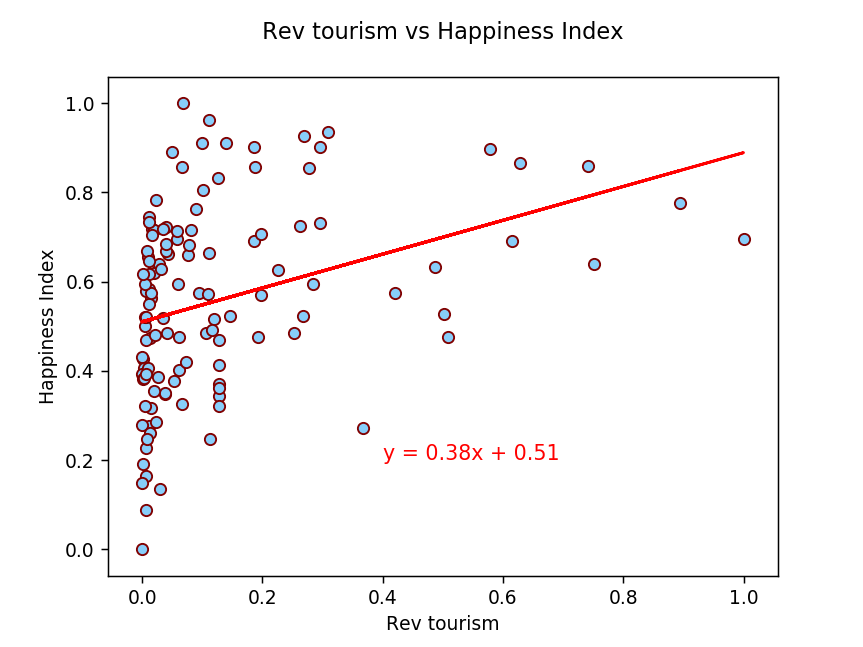

The r-squared is: 0.3438166304925143


In [255]:
# Display scatter plot, correlation & linear equation
linregres_func(fill_rev_tourism["Rev tourism"], fill_rev_tourism["Happiness Index"], 'Rev tourism', 'Happiness Index', 0.4, 0.2, 'RevTourism vs Happiness.png')

---
### Average Age  vs Happiness

In [246]:
# Select variables and check NaN values
Average_Age = df_normalized.loc[:, ['Country name', 'Happiness Index', 'Average Age']]
Average_Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   Average Age      120 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [247]:
# Calculate mean to replace NaN
Average_Age.mean()

Happiness Index    0.558208
Average Age        0.503710
dtype: float64

In [248]:
# Fill in mean values and re-check info
fill_Average_Age = Average_Age.fillna(Average_Age.mean())
fill_Average_Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   Average Age      122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


<IPython.core.display.Javascript object>


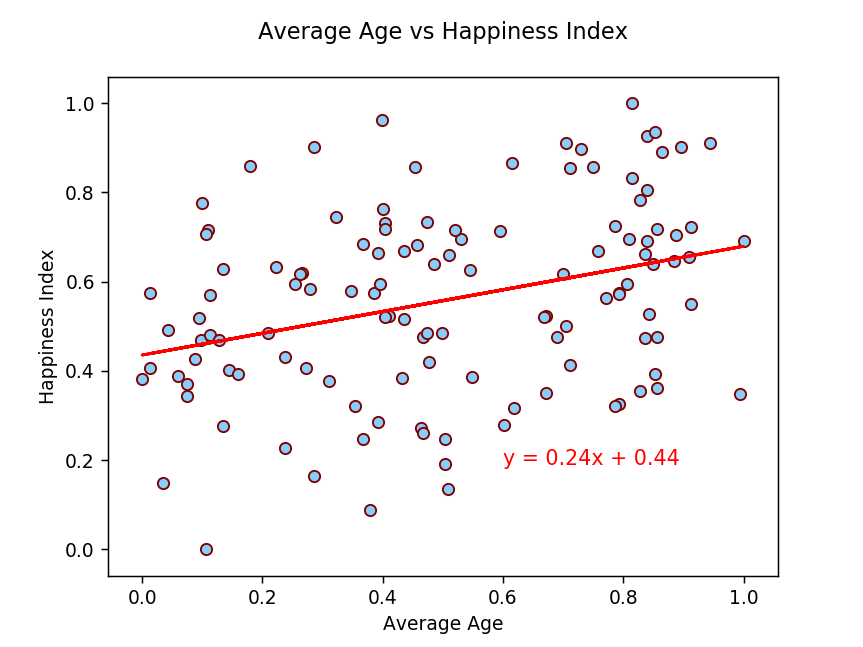

The r-squared is: 0.3269373151135889


In [254]:
# Display scatter plot, correlation & linear equation
linregres_func(fill_Average_Age["Average Age"], fill_Average_Age["Happiness Index"], 'Average Age', 'Happiness Index', 0.6, 0.19, 'Average Age vs Happiness.png')

---
### Brain Drain vs Happiness

In [258]:
# Select variables and check NaN values
brain_drain = df_normalized.loc[:, ['Country name', 'Happiness Index', 'brain drain',]]
brain_drain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   brain drain      120 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [260]:
# Calculate mean to replace NaN
brain_drain.mean()

Happiness Index    0.558208
brain drain        0.525333
dtype: float64

In [261]:
# Fill in mean values and re-check info
fill_brain_drain = brain_drain.fillna(brain_drain.mean())
fill_brain_drain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   brain drain      122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


<IPython.core.display.Javascript object>


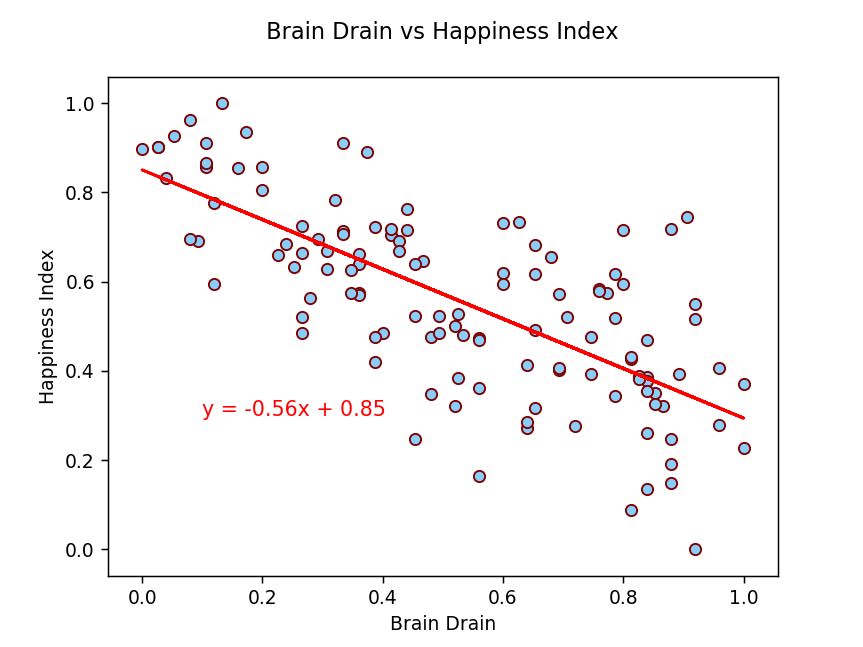

The r-squared is: -0.7208045459763628


In [265]:
# Display scatter plot, correlation & linear equation
linregres_func(fill_brain_drain["brain drain"], fill_brain_drain["Happiness Index"], 'Brain Drain', 'Happiness Index', 0.1, 0.3, 'Brain drain vs Happiness.png')

### Security Threat vs Happiness

In [267]:
# Select variables and check NaN values
Security_index = df_normalized.loc[:, ['Country name', 'Happiness Index', 'Security index',]]
Security_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   Security index   120 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [268]:
# Calculate mean to replace NaN
Security_index.mean()

Happiness Index    0.558208
Security index     0.493391
dtype: float64

In [269]:
# Fill in mean values and re-check info
fill_Security_index = Security_index.fillna(Security_index.mean())
fill_Security_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country name     122 non-null    object 
 1   Happiness Index  122 non-null    float64
 2   Security index   122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


<IPython.core.display.Javascript object>


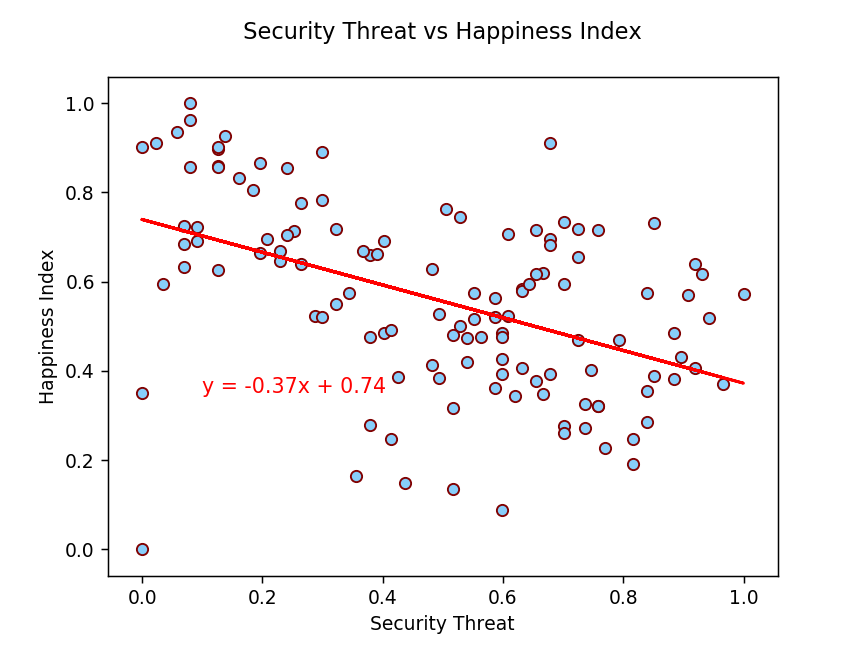

The r-squared is: -0.47009985719307334


In [271]:
# Display scatter plot, correlation & linear equation
linregres_func(fill_Security_index["Security index"], fill_brain_drain["Happiness Index"], 'Security Threat', 'Happiness Index', 0.1, 0.35, 'Security Threat vs Happiness.png')